In [67]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [68]:
racialProfiling_Onehotted = pd.read_csv ("racialProfUpdated_Onehotted_2.csv")
print (racialProfiling_Onehotted.shape)  # Shows number of rows and columns
pd.DataFrame.head (racialProfiling_Onehotted)

(45271, 40)


,Unnamed: 0,Stop_Key,Arrest,Sex_Female/Male,Race_known,Stopped_TrafficViolation,Stopped_City/Highway,Search_Yes/No,Council_District_9,Council_District_7,...,Black,Other_Races,Stop_Month,Stop_Day,Stop_Year,Stop_Time,Y_COORDINATE,X_COORDINATE,Location,Zip_Code
0,0,20201-459626502-25962,0,1,0,1,1,0,1,0,...,0,0,12,23,20,2154,10071013,3116003,500 E 8TH ST,78701
1,1,20202-459626535-25972,0,0,0,1,1,0,0,0,...,0,0,12,23,20,2305,10064105,3106942,1800 S LAMAR BLVD,78704
2,3,20204-459754277-68427,0,0,0,1,1,0,0,0,...,0,0,1,1,20,1049,10111289,3123026,1900 RUTLAND DR,78758
3,4,20205-65602014-68425,0,1,0,1,1,0,0,0,...,0,0,1,1,20,1036,10119108,3112256,11000 RESEARCH BLVD NB,78759
4,5,20206-459276358-68461,0,1,0,1,0,0,0,0,...,0,0,1,1,20,1356,10144782,3094826,LAKELINE MALL DR / N US 183 HWY SVRD SB,78613


In [69]:
racialProfiling_Onehotted.describe()

,Unnamed: 0,Arrest,Sex_Female/Male,Race_known,Stopped_TrafficViolation,Stopped_City/Highway,Search_Yes/No,Council_District_9,Council_District_7,Council_District_3,...,Hispanic_Latino,Black,Other_Races,Stop_Month,Stop_Day,Stop_Year,Stop_Time,Y_COORDINATE,X_COORDINATE,Zip_Code
count,45271.000000,45271.000000,45271.000000,45271.000000,45271.000000,45271.000000,45271.000000,45271.000000,45271.000000,45271.000000,...,45271.000000,45271.000000,45271.000000,45271.000000,45271.000000,45271.0,45271.000000,4.527100e+04,4.527100e+04,45271.000000
mean,23261.161759,0.074419,0.635860,0.024077,0.870646,0.577898,0.088975,0.147247,0.320338,0.149765,...,0.310861,0.150317,0.054980,5.688078,15.923969,20.0,1193.208721,1.008820e+07,3.117086e+06,78735.522984
std,13441.965456,0.262454,0.481194,0.153291,0.335595,0.493900,0.284711,0.354355,0.466611,0.356845,...,0.462851,0.357386,0.227944,3.645757,8.635239,0.0,617.169920,3.129205e+04,1.282639e+04,27.330235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,20.0,0.000000,9.986460e+06,3.038957e+06,78610.000000
25%,11598.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,9.000000,20.0,849.000000,1.006279e+07,3.111177e+06,78721.000000
50%,23262.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,16.000000,20.0,1205.000000,1.008638e+07,3.116921e+06,78745.000000
75%,34903.500000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,9.000000,23.000000,20.0,1616.000000,1.011512e+07,3.124585e+06,78757.000000
max,46783.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,12.000000,31.000000,20.0,2359.000000,1.016903e+07,3.186680e+06,78759.000000


In [70]:
racialProfiling_Onehotted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45271 entries, 0 to 45270
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                45271 non-null  int64 
 1   Stop_Key                  45271 non-null  object
 2   Arrest                    45271 non-null  int64 
 3   Sex_Female/Male           45271 non-null  int64 
 4   Race_known                45271 non-null  int64 
 5   Stopped_TrafficViolation  45271 non-null  int64 
 6   Stopped_City/Highway      45271 non-null  int64 
 7   Search_Yes/No             45271 non-null  int64 
 8   Council_District_9        45271 non-null  int64 
 9   Council_District_7        45271 non-null  int64 
 10  Council_District_3        45271 non-null  int64 
 11  Council_District_2        45271 non-null  int64 
 12  Council_District_4        45271 non-null  int64 
 13  Council_District_6        45271 non-null  int64 
 14  Council_District_10   

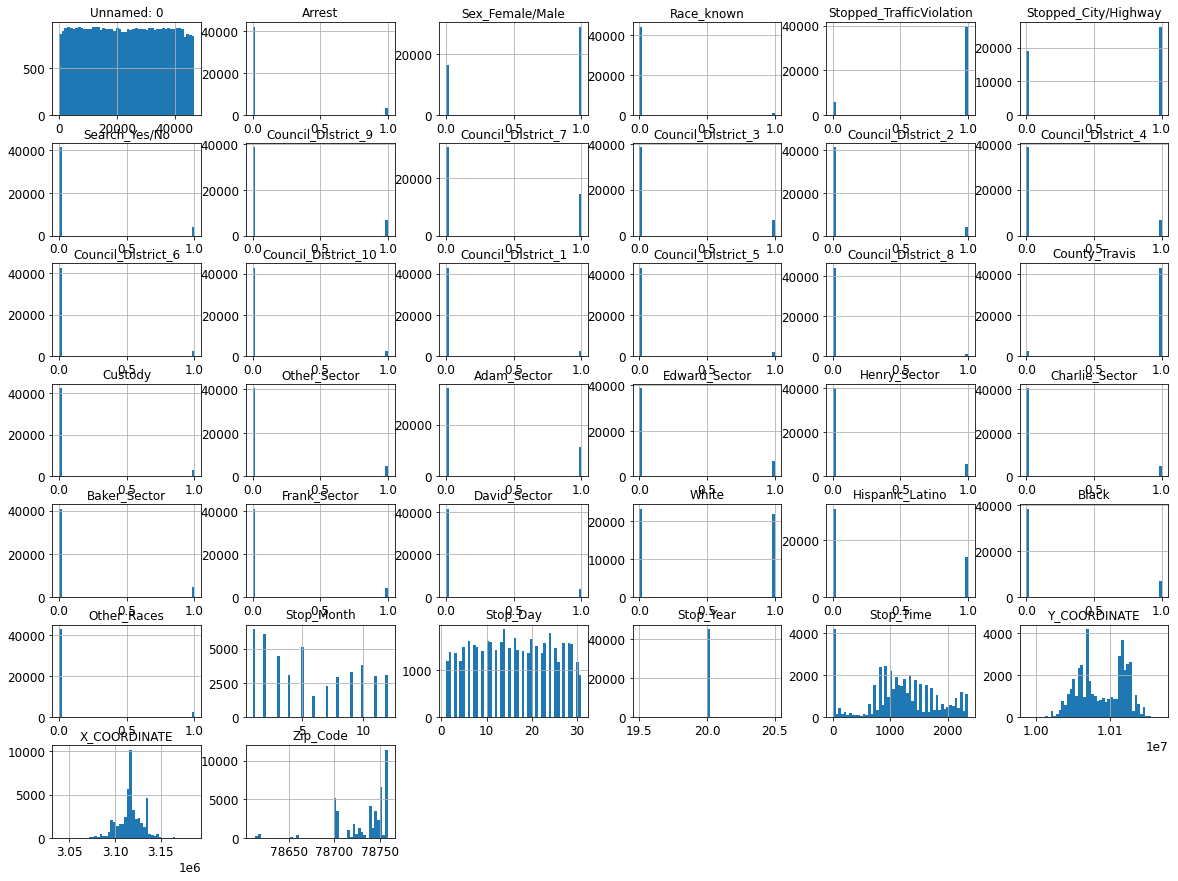

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

racialProfiling_Onehotted.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [72]:
racialProfiling_Onehotted = racialProfiling_Onehotted.drop("Y_COORDINATE", axis=1)
racialProfiling_Onehotted = racialProfiling_Onehotted.drop("X_COORDINATE", axis=1)
racialProfiling_Onehotted = racialProfiling_Onehotted.drop("Stop_Day", axis=1)
racialProfiling_Onehotted = racialProfiling_Onehotted.drop("Unnamed: 0", axis=1)

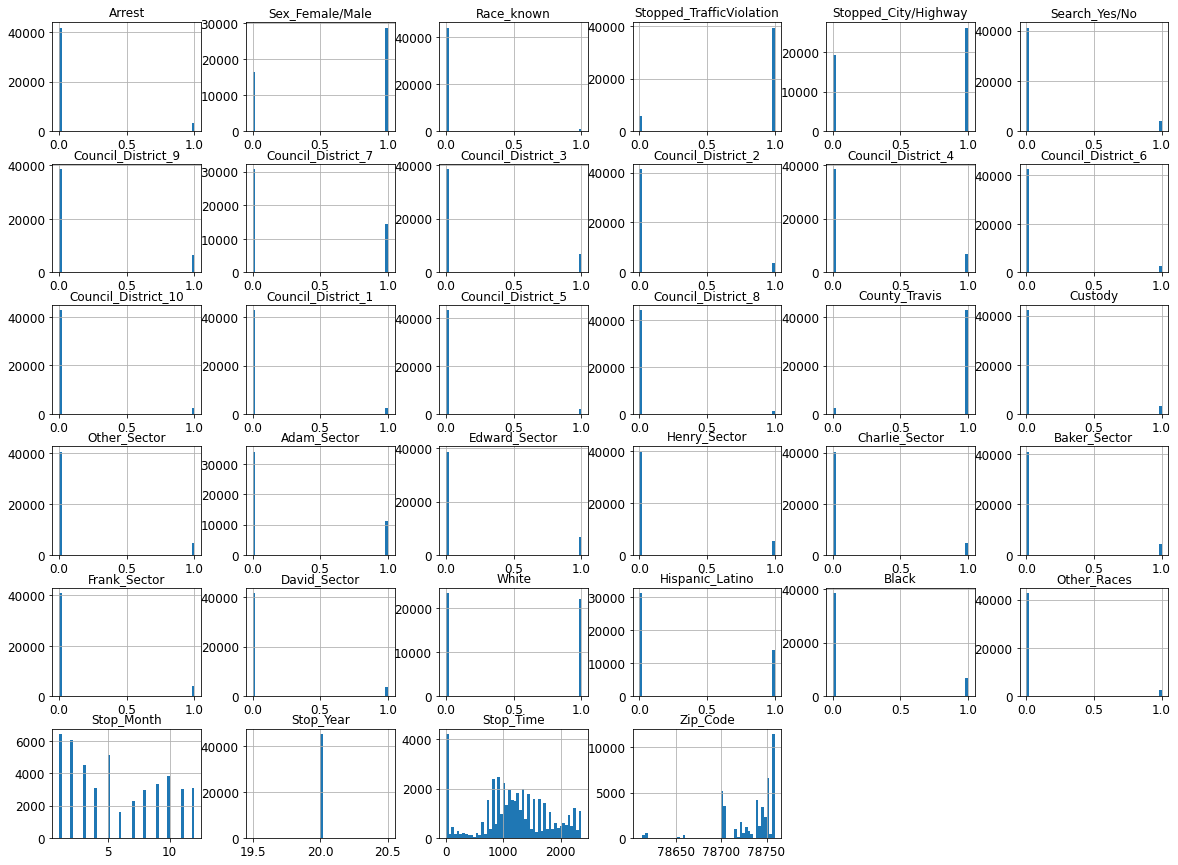

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

racialProfiling_Onehotted.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [74]:
racialProfiling_Onehotted.shape

(45271, 36)

In [76]:
racialProfiling_Onehotted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45271 entries, 0 to 45270
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Stop_Key                  45271 non-null  object
 1   Arrest                    45271 non-null  int64 
 2   Sex_Female/Male           45271 non-null  int64 
 3   Race_known                45271 non-null  int64 
 4   Stopped_TrafficViolation  45271 non-null  int64 
 5   Stopped_City/Highway      45271 non-null  int64 
 6   Search_Yes/No             45271 non-null  int64 
 7   Council_District_9        45271 non-null  int64 
 8   Council_District_7        45271 non-null  int64 
 9   Council_District_3        45271 non-null  int64 
 10  Council_District_2        45271 non-null  int64 
 11  Council_District_4        45271 non-null  int64 
 12  Council_District_6        45271 non-null  int64 
 13  Council_District_10       45271 non-null  int64 
 14  Council_District_1    

In [77]:
# How many unique() values are in Agency Column
uniqueZips = racialProfiling_Onehotted.Zip_Code.unique()
len(uniqueZips)

51

In [78]:
austinHousingData = pd.read_csv ("austinHousingData.csv")
print (austinHousingData.shape)  # Shows number of rows and columns
pd.DataFrame.head (austinHousingData)

(15171, 47)


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [79]:
austinHousingData = austinHousingData.rename(columns={"zipcode": "Zip_Code"})

pd.DataFrame.head (austinHousingData)

,zpid,city,streetAddress,Zip_Code,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [29]:
austinHousingData.shape
austinHousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zip_Code                    15171 non-null  int64  
 1   latitude                    15171 non-null  float64
 2   longitude                   15171 non-null  float64
 3   propertyTaxRate             15171 non-null  float64
 4   numPriceChanges             15171 non-null  int64  
 5   latest_saledate             15171 non-null  object 
 6   latest_salemonth            15171 non-null  int64  
 7   latest_saleyear             15171 non-null  int64  
 8   latestPriceSource           15171 non-null  object 
 9   numOfPhotos                 15171 non-null  int64  
 10  numOfAccessibilityFeatures  15171 non-null  int64  
 11  numOfAppliances             15171 non-null  int64  
 12  numOfParkingFeatures        15171 non-null  int64  
 13  numOfPatioAndPorchFeatures  151

In [80]:


new_dataset = austinHousingData[['Zip_Code',
                                 'latitude','longitude',
                                 'propertyTaxRate','numPriceChanges',
                                 'avgSchoolRating','MedianStudentsPerTeacher']]

new_dataset.shape

(15171, 7)

In [81]:
# Dropping the remaining NaN values 
new_dataset = new_dataset.dropna()
new_dataset.shape

(15171, 7)

In [43]:
racialProfiling_Onehotted.shape

(45271, 40)

In [82]:
# How many unique() values are in Agency Column
uniqueZips01 = new_dataset.Zip_Code.unique()
len(uniqueZips01)

48

In [83]:
new_dataset.head()

,Zip_Code,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher
0,78660,30.430632,-97.663078,1.98,5,2.666667,14
1,78660,30.432673,-97.661697,1.98,1,2.666667,14
2,78660,30.409748,-97.639771,1.98,1,3.000000,14
3,78660,30.432112,-97.661659,1.98,4,2.666667,14
4,78660,30.437368,-97.656860,1.98,3,4.000000,14


In [90]:
new_dataset['Zip_Code_1'] = new_dataset['Zip_Code']
new_dataset.head()

,Zip_Code,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher,Zip_Code_1
0,78660,30.430632,-97.663078,1.98,5,2.666667,14,78660
1,78660,30.432673,-97.661697,1.98,1,2.666667,14,78660
2,78660,30.409748,-97.639771,1.98,1,3.000000,14,78660
3,78660,30.432112,-97.661659,1.98,4,2.666667,14,78660
4,78660,30.437368,-97.656860,1.98,3,4.000000,14,78660


In [91]:
socioEcoZipCodesInfo = pd.DataFrame(new_dataset.groupby(['Zip_Code_1']).mean())
#new_dataset.groupby(['Zip_Code']).mean()
socioEcoZipCodesInfo.head()

,Zip_Code,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher
Zip_Code_1,,,,,,,
78617,78617.0,30.164515,-97.634066,1.9800,2.558140,3.158915,13.965116
78619,78619.0,30.136291,-97.975780,2.0100,1.916667,7.388889,15.666667
78652,78652.0,30.147471,-97.846363,1.9875,1.500000,4.500000,14.250000
78653,78653.0,30.348232,-97.603903,1.9800,2.750000,4.250000,11.750000
78660,78660.0,30.423477,-97.651394,1.9800,2.250000,3.277778,13.305556


In [92]:
socioEcoZipCodesInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 78617 to 78759
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zip_Code                  48 non-null     float64
 1   latitude                  48 non-null     float64
 2   longitude                 48 non-null     float64
 3   propertyTaxRate           48 non-null     float64
 4   numPriceChanges           48 non-null     float64
 5   avgSchoolRating           48 non-null     float64
 6   MedianStudentsPerTeacher  48 non-null     float64
dtypes: float64(7)
memory usage: 3.0 KB


In [93]:
socioEcoZipCodesInfo['Zip_Code'] = socioEcoZipCodesInfo['Zip_Code'].astype('int64')

In [94]:
socioEcoZipCodesInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 78617 to 78759
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zip_Code                  48 non-null     int64  
 1   latitude                  48 non-null     float64
 2   longitude                 48 non-null     float64
 3   propertyTaxRate           48 non-null     float64
 4   numPriceChanges           48 non-null     float64
 5   avgSchoolRating           48 non-null     float64
 6   MedianStudentsPerTeacher  48 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.0 KB


In [89]:
socioEcoZipCodesInfo.shape

(48, 6)

In [96]:
socioEcoZipCodesInfo.head()

,Zip_Code,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher
Zip_Code_1,,,,,,,
78617,78617,30.164515,-97.634066,1.9800,2.558140,3.158915,13.965116
78619,78619,30.136291,-97.975780,2.0100,1.916667,7.388889,15.666667
78652,78652,30.147471,-97.846363,1.9875,1.500000,4.500000,14.250000
78653,78653,30.348232,-97.603903,1.9800,2.750000,4.250000,11.750000
78660,78660,30.423477,-97.651394,1.9800,2.250000,3.277778,13.305556


In [97]:
mergedDF = racialProfiling_Onehotted.merge(socioEcoZipCodesInfo, on ='Zip_Code', how = 'outer')


In [98]:
mergedDF.shape


(45274, 42)

In [99]:
mergedDF.head()

,Stop_Key,Arrest,Sex_Female/Male,Race_known,Stopped_TrafficViolation,Stopped_City/Highway,Search_Yes/No,Council_District_9,Council_District_7,Council_District_3,...,Stop_Year,Stop_Time,Location,Zip_Code,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher
0,20201-459626502-25962,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,20.0,2154.0,500 E 8TH ST,78701,30.273001,-97.746111,1.98,4.375,6.0,16.0
1,2020222-459888916-68495,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,20.0,2045.0,E 8TH ST / NECHES ST,78701,30.273001,-97.746111,1.98,4.375,6.0,16.0
2,2020238-459888936-68379,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,20.0,2049.0,300 W 6TH ST,78701,30.273001,-97.746111,1.98,4.375,6.0,16.0
3,2020244-459639377-68384,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,20.0,2118.0,600 NUECES ST,78701,30.273001,-97.746111,1.98,4.375,6.0,16.0
4,2020245-459888941-68382,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,20.0,2112.0,700 E 7TH ST,78701,30.273001,-97.746111,1.98,4.375,6.0,16.0


In [100]:
# How many unique() values are in Agency Column
uniqueZips01 = mergedDF.Zip_Code.unique()
len(uniqueZips01)

54

In [101]:
mergedDF.to_csv('RacialPro_MergedDataset.csv', encoding='utf-8')